# This is based on the blind source separation example in scikit-learn 
https://scikit-learn.org/stable/auto_examples/decomposition/plot_ica_blind_source_separation.html

In [26]:
import numpy as np
from scipy import signal

np.random.seed(0)
n_samples = 2000
time = np.linspace(0, 8, n_samples)

s1 = np.sin(2 * time)
s2 = np.cos(3 * time)  
s3 = np.cos(2 * np.pi * time)

S = np.c_[s1, s2, s3]
S += 0.2 * np.random.normal(size=S.shape)  # Add noise

S /= S.std(axis=0)  # Standardize data
# Mix data
A = np.array([[1, 1, 1], [0.5, 2, 1.0], [1.5, 1.0, 2.0]])  # Mixing matrix
X = np.dot(S, A.T)  # Generate observations

In [27]:
from sklearn.decomposition import FastICA, PCA

# Compute ICA:
ica = FastICA(n_components=3, whiten="arbitrary-variance")
S_ = ica.fit_transform(X)

# For comparison, compute PCA:
pca = PCA(n_components=3)
H = pca.fit_transform(X)

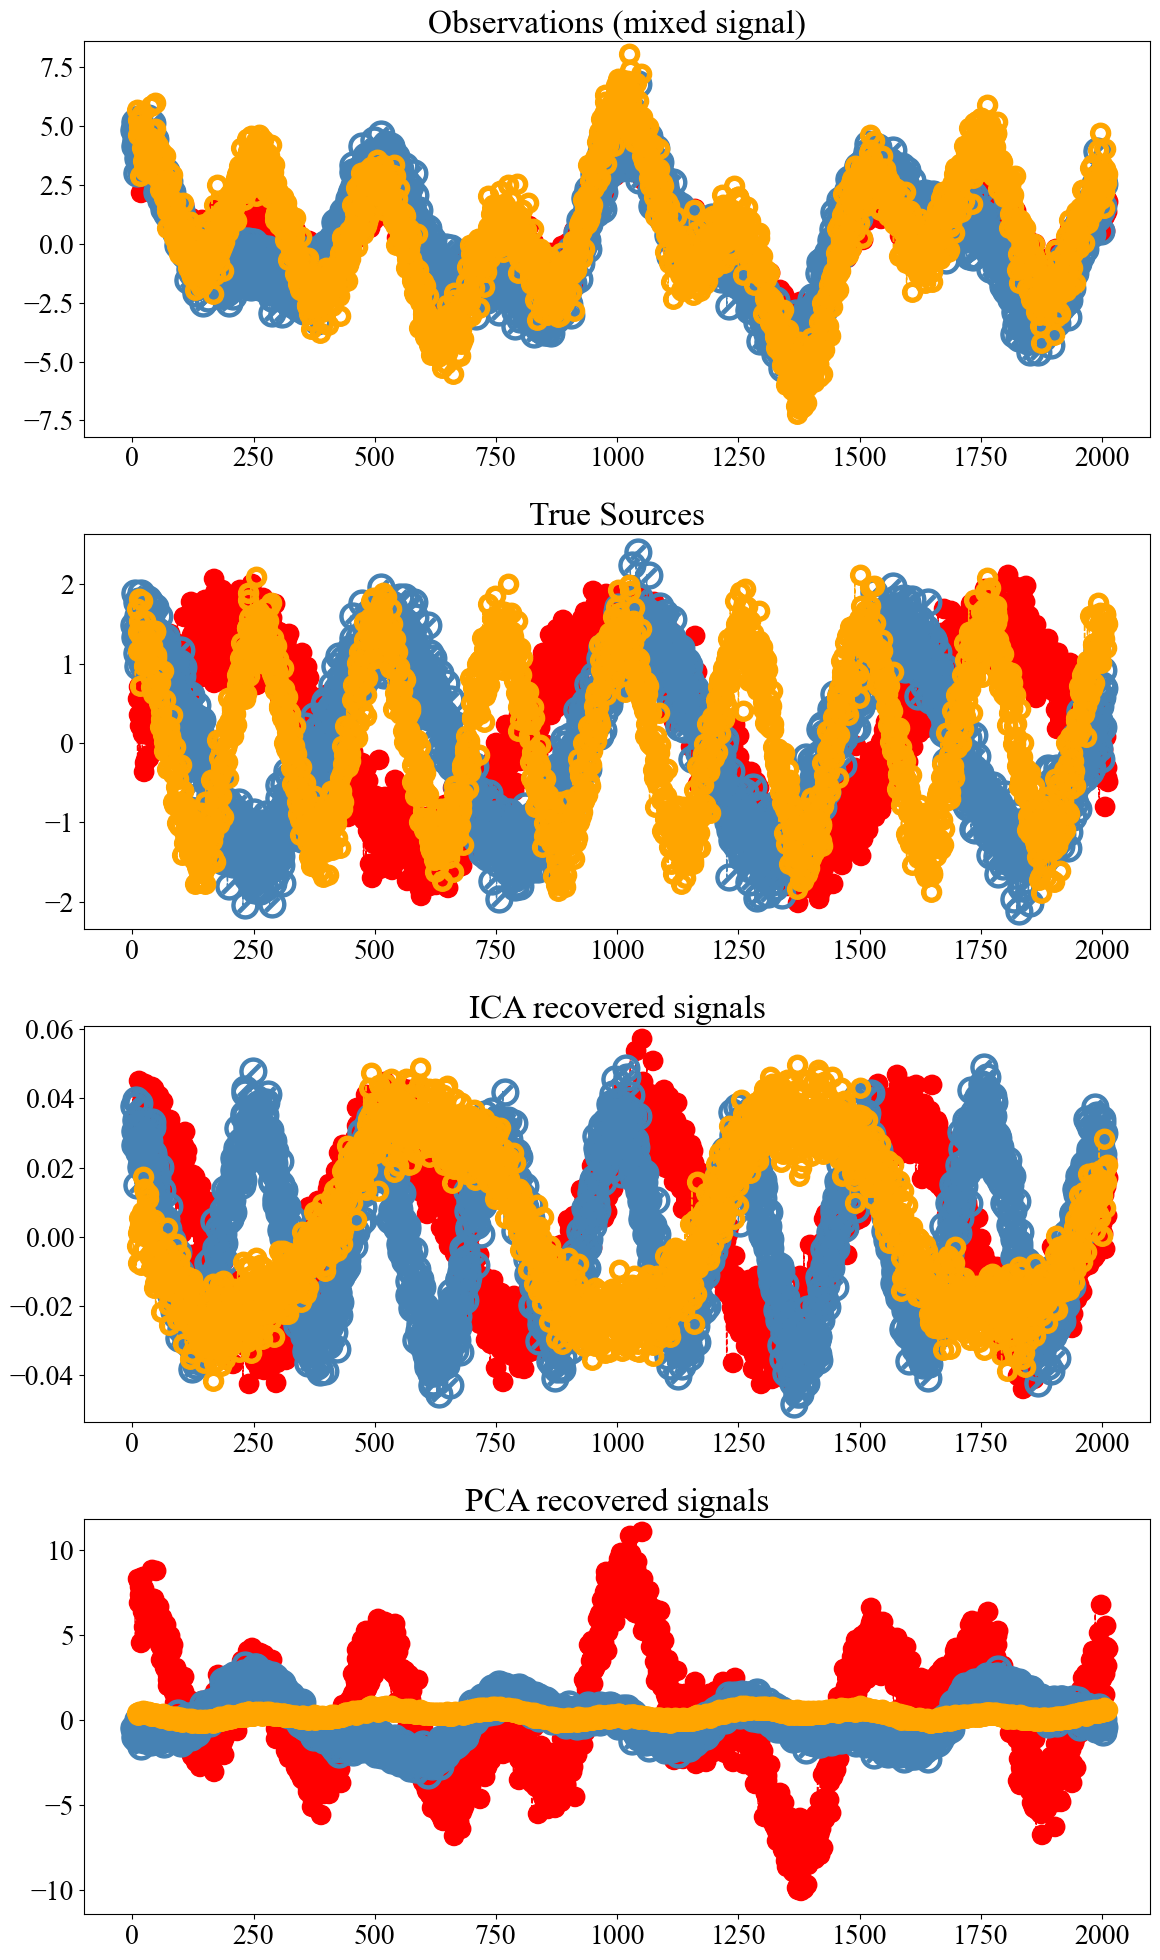

In [28]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 20))

models = [X, S, S_, H]
names = [
    "Observations (mixed signal)",
    "True Sources",
    "ICA recovered signals",
    "PCA recovered signals",
]
colors = ["red", "steelblue", "orange"]

for ii, (model, name) in enumerate(zip(models, names), 1):
    plt.subplot(4, 1, ii)
    plt.title(name)
    for sig, color in zip(model.T, colors):
        plt.plot(sig, color=color)

plt.tight_layout()